In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)

Sample labels (y_train): [5 0 4 1 9 2 1 3 1 4]

Head (first 5 labels):
   Label
0      5
1      0
2      4
3      1
4      9

Describe (label distribution in first 20 samples):
           Label
count  20.000000
mean    4.000000
std     2.790963
min     0.000000
25%     1.750000
50%     3.500000
75%     6.000000
max     9.000000


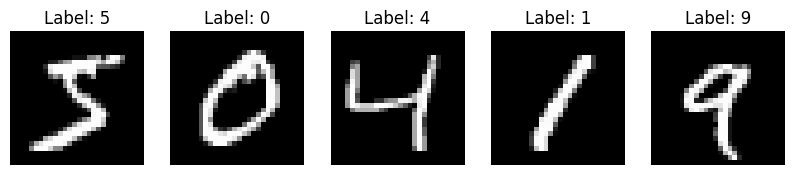


After one-hot encoding:
y_train[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
import pandas as pd
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

print("\nSample labels (y_train):", y_train[:10])

df = pd.DataFrame({"Label": y_train[:20]})
print("\nHead (first 5 labels):")
print(df.head())

print("\nDescribe (label distribution in first 20 samples):")
print(df.describe())

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("\nAfter one-hot encoding:")
print("y_train[0]:", y_train[0])


In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Assuming your model is already defined
# For example: model = Sequential([...])

# 1. COMPILE the model (This is the missing step)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 2. Now you can FIT (train) the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=128,
                    verbose=2)

Epoch 1/10
469/469 - 3s - 7ms/step - accuracy: 0.9089 - loss: 0.3234 - val_accuracy: 0.9525 - val_loss: 0.1563
Epoch 2/10
469/469 - 2s - 4ms/step - accuracy: 0.9622 - loss: 0.1301 - val_accuracy: 0.9649 - val_loss: 0.1162
Epoch 3/10
469/469 - 3s - 5ms/step - accuracy: 0.9735 - loss: 0.0911 - val_accuracy: 0.9697 - val_loss: 0.0963
Epoch 4/10
469/469 - 3s - 6ms/step - accuracy: 0.9794 - loss: 0.0696 - val_accuracy: 0.9731 - val_loss: 0.0864
Epoch 5/10
469/469 - 2s - 4ms/step - accuracy: 0.9835 - loss: 0.0550 - val_accuracy: 0.9726 - val_loss: 0.0867
Epoch 6/10
469/469 - 2s - 5ms/step - accuracy: 0.9865 - loss: 0.0441 - val_accuracy: 0.9768 - val_loss: 0.0794
Epoch 7/10
469/469 - 3s - 5ms/step - accuracy: 0.9885 - loss: 0.0369 - val_accuracy: 0.9762 - val_loss: 0.0752
Epoch 8/10
469/469 - 2s - 5ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0.9757 - val_loss: 0.0843
Epoch 9/10
469/469 - 2s - 5ms/step - accuracy: 0.9919 - loss: 0.0257 - val_accuracy: 0.9784 - val_loss: 0.0781
E

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f":Accuracy: {test_acc:.4f}")


:Accuracy: 0.9728


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


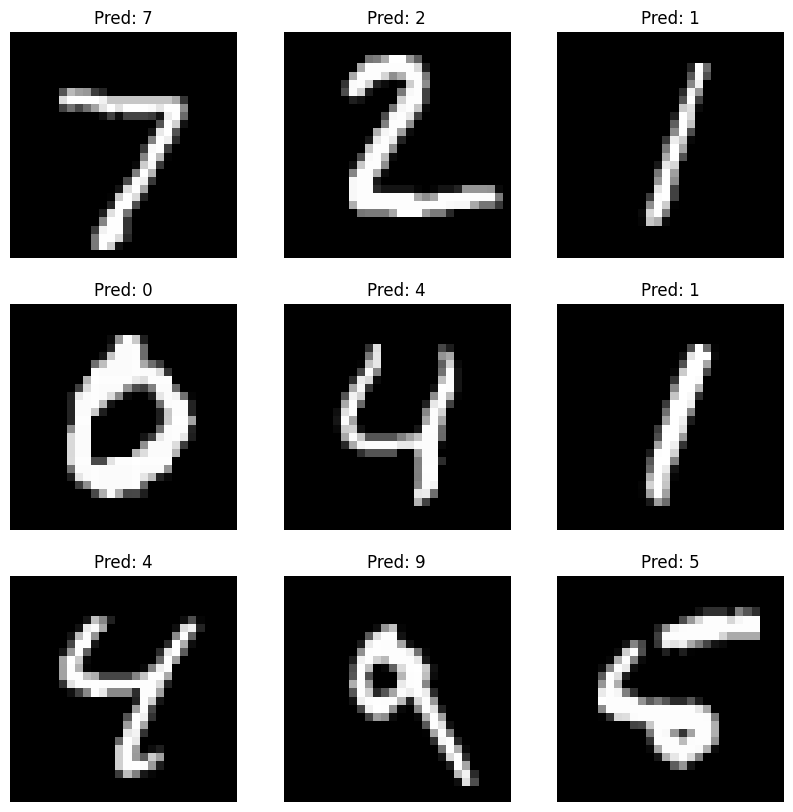

In [10]:
predictions = model.predict(x_test[:9])

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()